# Python Statistics Essential Training

## Collecting and Cleaning Data

### 01_01 - Loading data

Using the Ames, Iowa Housing Data https://jse.amstat.org/v19n3/decock.pdf


Goals:

1. Load data from a CSV file using the `pd.read_csv` function.
2. Understand how to access and interpret the shape of a DataFrame.
3. Apply the `.describe` method to obtain summary statistics for a DataFrame.

In [38]:
# 01_06
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
            .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
                    **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
            .pipe(shrink_ints)
            )


url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')
housing = clean_housing(raw)


In [2]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,NA,IR1,Lvl,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,NA,IR1,Low,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77,10010,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [ ]:
import numpy as np
import pandas as pd
pd.__version__

In [ ]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
url = 'data/ames-housing-dataset.zip'
df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.describe()

### 01_02 - Strings and Categories


Goals:

* Understand the data types of columns in a DataFrame using the `.dtypes` attribute.
* Select and filter categorical columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for categorical columns using the `.describe` method.
* Determine the memory usage of string columns in a DataFrame.
* Convert string columns to the `'category'` data type to save memory.


In [ ]:
df.dtypes

In [ ]:
# Categoricals - Pandas 1.x
df.select_dtypes(object)

In [ ]:
# Categoricals - Pandas 2
df.select_dtypes('string')  # or 'strings[pyarrow]'

In [ ]:
# Categoricals
df.select_dtypes('string').describe().T

In [ ]:
(df
 .select_dtypes('string')
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
(df
 .select_dtypes('string')
 .astype('category')
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
957_287 / 139_033

In [ ]:
df.shape

In [ ]:
# Missing numeric columns (and strings in Pandas 1)
(df
 .isna()
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
# Missing string values
(df
 .select_dtypes('string')
 .eq('')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
(df
 .select_dtypes('string')
 .eq('')
 .any(axis='columns')
)


In [ ]:
# deleting
# Notice Alley is NA!
(df
 [~df.select_dtypes('string').eq('').any(axis='columns')]
)

In [ ]:
# Looks like many values are NA
# Missing string values (Encoded as NA)
(df
 .select_dtypes('string')
 .eq('NA')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

In [ ]:
(df
 .query('`Pool QC`.isna()')
)

In [ ]:
(df
 .query('`Pool QC` == "NA"')
)

In [ ]:
# Fill in empty string with 'Not Applicable'
(df
 .assign(
     **df.select_dtypes('string').replace('', 'Not Applicable'))
)

In [ ]:
# Examining unique values
# Note the empty string
(df
 .Electrical
 .value_counts()
)

In [ ]:
(df
 .query('Electrical == ""')
)

In [ ]:
# This one was encoded as NA
(df
 ['Fireplace Qu']
 .value_counts()
)

In [ ]:
(df
 ['Bsmt Cond']
 .value_counts()
)

In [ ]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
)

In [ ]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     #.astype('category')
 )
 .memory_usage(deep=True)
 .sum()
)

### 01_03 - Cleaning Numbers

Goals:

* Select and filter numeric columns using the `.select_dtypes` method.
* Compute and interpret summary statistics for numeric columns using the `.describe` method.
* Identify missing values in numeric columns.
* Display a larger amount of data using options for minimum rows and maximum columns.
* Utilize the `style` attribute to enhance the display of DataFrames.

In [ ]:
# In Pandas 1.x there would be many numbers here
(df
 .select_dtypes(float)
)

In [ ]:
(df
 .select_dtypes(int)
)

In [ ]:
(df
 .select_dtypes(int)
 .describe()
)

In [ ]:
df.shape

In [ ]:
(df
 .query('`Lot Frontage`.isna()')
)

In [ ]:
# How to see more data
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
    )

In [ ]:
df.style.set_sticky?

In [ ]:
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
     .style
     .set_sticky(axis='columns') # broken 
     .set_sticky(axis='index')
    )    

In [ ]:
# Examine a column with missing values
(df
 .query('`Garage Yr Blt`.isna()')
 )

In [ ]:
# missing + 2207!!!?
(df
 ['Garage Yr Blt']
 .describe()
)

In [ ]:
# probably a typo!!
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):  
    display(df.query('`Garage Yr Blt` > 2200'))

In [ ]:
# Any columns with Yr
df.filter?

In [ ]:
(df
 .filter(like='Yr')
)

In [ ]:
# Any columns with Yr > 2023
(df
 .filter(like='Yr')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

In [ ]:
# What about "Year" columns?
(df
 .rename(columns=lambda name: name.replace('Yr', 'Year'))
 .filter(like='Year')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

In [ ]:
(df
 ['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_index()
)

In [ ]:
# Update categories and clip
# Inspect types
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .dtypes.value_counts()
)

### 01_04 - Shrinking Numbers

Goals:

* Create a function, `shrink_ints`, to automatically convert suitable integer columns to smaller integer types (`uint8`, `uint16`, `uint32`) based on their range of values.
* Apply the `shrink_ints` function to the DataFrame to reduce memory usage while maintaining data integrity.
* Create a function, `clean_housing`, that combines the data cleaning steps for string columns, clipping values in the "Garage Yr Blt" column, and shrinking integer columns.


In [ ]:
# continuing where we left off
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .describe()
)

In [ ]:
for size in [np.uint8, np.uint16, np.uint32]:
    print(np.iinfo(size))

In [ ]:
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)
            
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .describe()
)

In [ ]:
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
(df
 .memory_usage(deep=True)
 .sum()
)

In [ ]:
1_875_484 / 361_446

In [ ]:
# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

clean_housing(df).dtypes

### 01_05 - Challenge: Clean Ames 

* Create a cell containing all the imports for this notebook
* Create a cell with the `clean_housing` and `shrink_ints` functions
* Add code to load the raw data and create a `housing` variable from calling `clean_housing`
* Move those cells to the top of the notebook
* Restart the notebook and make sure that those cells work

In [ ]:
# 01_06
import numpy as np
import pandas as pd


def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
            .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
                    **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
            .pipe(shrink_ints)
            )


url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')
housing = clean_housing(raw)


## Exploring & Visualizing

### 02_01 - Categorical Exploration

Goals:

* Explore a categorical column, such as "MS Zoning," by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [ ]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [ ]:
housing.describe()

In [ ]:
# categoricals
(housing
  ['MS Zoning'])

In [ ]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts())

In [ ]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.bar())

In [ ]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

### 02_02: Histograms and Distributions

Goals:

* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [ ]:
# Numerical
(housing
 .SalePrice
 .describe()
)

In [ ]:
# Numerical
(housing
 .SalePrice
 .hist()
)

In [ ]:
# Numerical
(housing
 .SalePrice
 .hist(bins=130)
)

### 02_03 - Outliers and Z-scores

Goals:

* Calculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether the Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.


In [3]:
# outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3       0.791170
4       0.113961
          ...   
2925   -0.479380
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [6]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 #.query('z_score.abs() >= 3')
 .query('z_score <= -3')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score


In [9]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

housing[
calc_iqr_outlier(housing, 'SalePrice')
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,0,NA,NA,NA,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,0,NA,NA,NA,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,3,2009,WD,Normal,610000
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,1,2009,New,Partial,582933


In [10]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,NA,IR2,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,NA,Reg,HLS,...,NA,NA,NA,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,NA,IR1,Lvl,...,NA,NA,NA,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,NA,Reg,Lvl,...,NA,NA,NA,0,1,2009,New,Partial,582933,True


### 02_04 - Correlations

Goals:

* Calculate the Pearson correlation
* Calculate the Spearman correlation 
* Color a correlation matrix appropriately

In [11]:
# Pearson correlation
housing.corr()

ValueError: could not convert string to float: 'RL'

In [12]:
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285


In [13]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [14]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [15]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

### 02_05 - Scatter Plots

Goals:

* Create a scatter plot
* Set transparency
* Jitter plot values

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

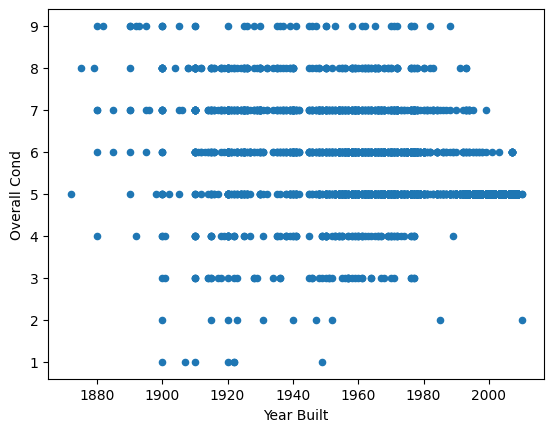

In [16]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond')
)

In [18]:
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

-0.42230619262743263

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

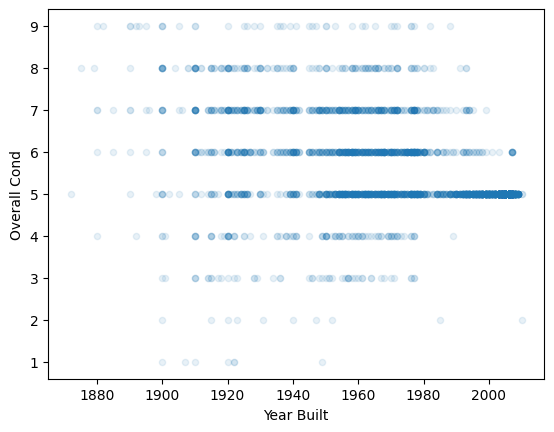

In [24]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

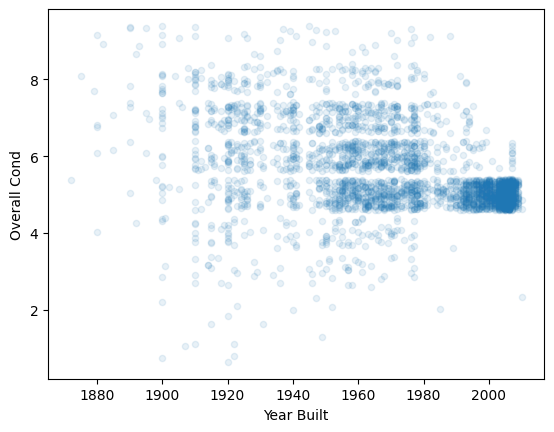

In [25]:
# with jitter in y
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

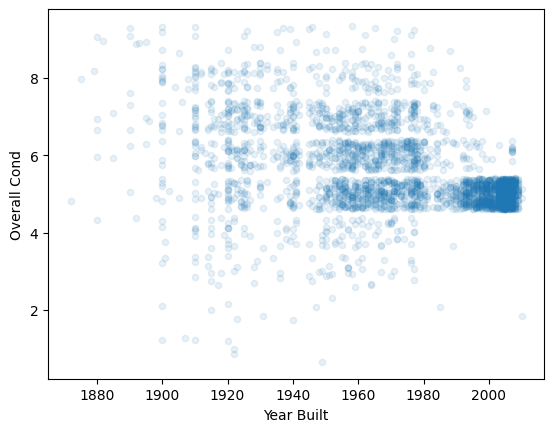

In [26]:
# make function
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

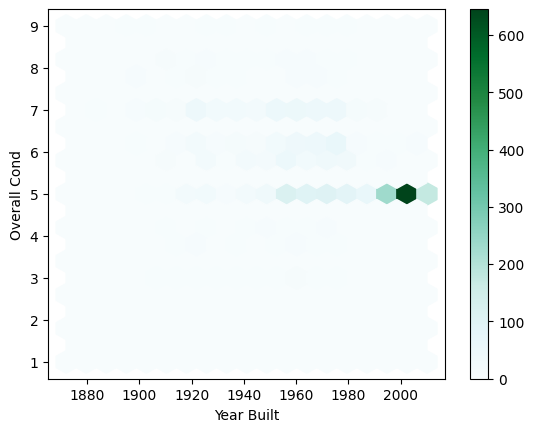

In [27]:

(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

### 02_06 - Visualizing Categoricals and Numerical Values

Goals:

* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivot` method
* Use Seaborn to create other distibution plots by category

<Axes: >

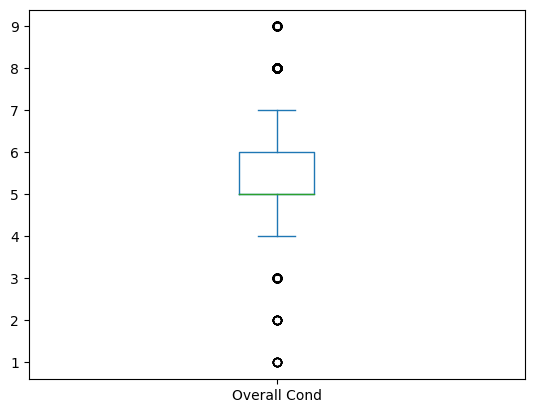

In [28]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

<Axes: >

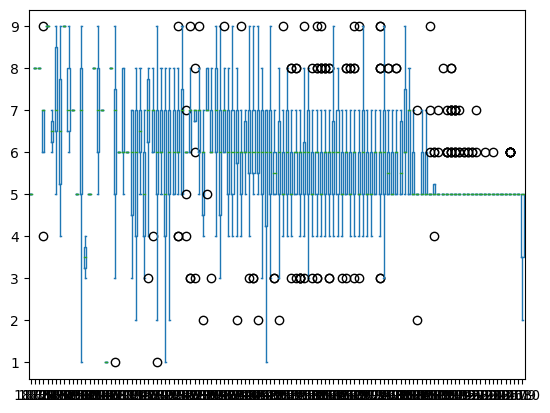

In [31]:
# Make multiple box plots
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

<Axes: >

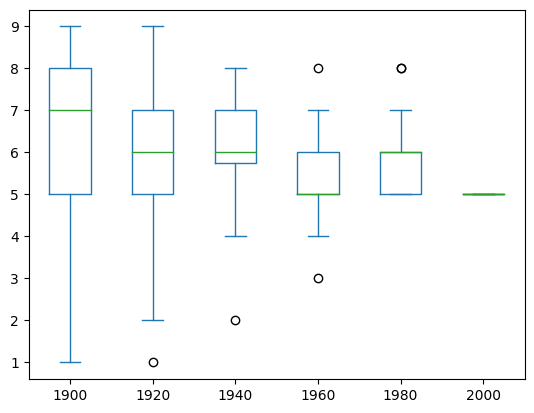

In [36]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

In [40]:
1993 // 10

199

<Axes: >

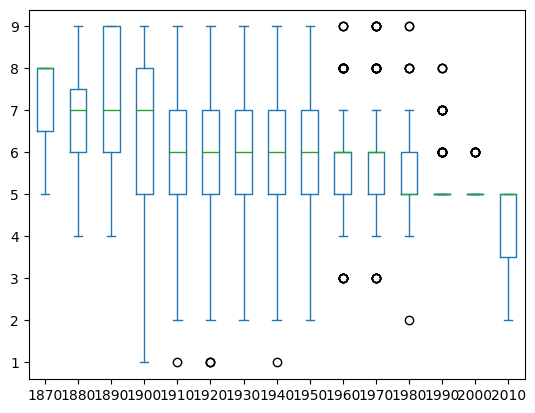

In [43]:
# Group by decade
(housing
 .assign(decade=(housing['Year Built']//10 ) * 10)
 .pivot(columns='decade', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

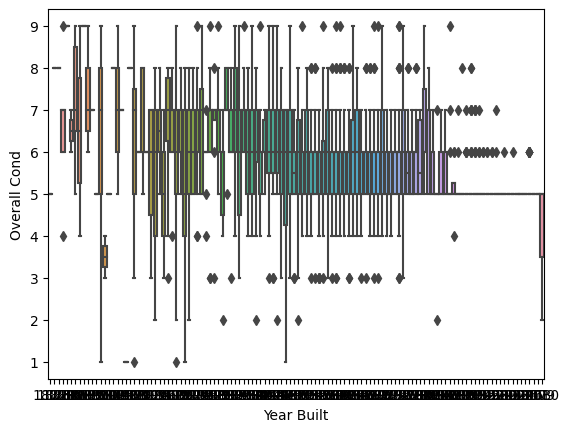

In [44]:
# or use seaborn
import seaborn as sns

sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

In [45]:
sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

.. note::
    This function always treats one of the variables as categorical and
    draws data at ordinal positions (0, 1, ... n) on the relevant axis,
    even when the data has a numeric or date type.

See th

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

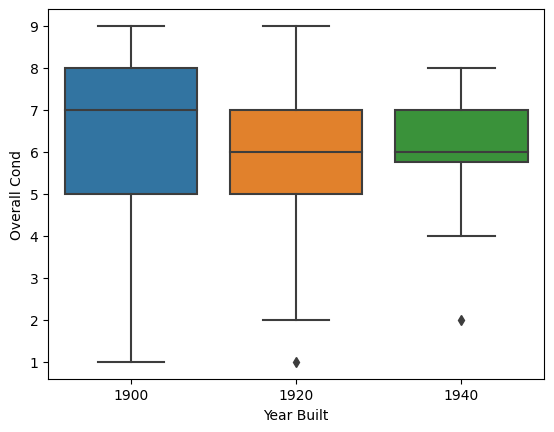

In [46]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

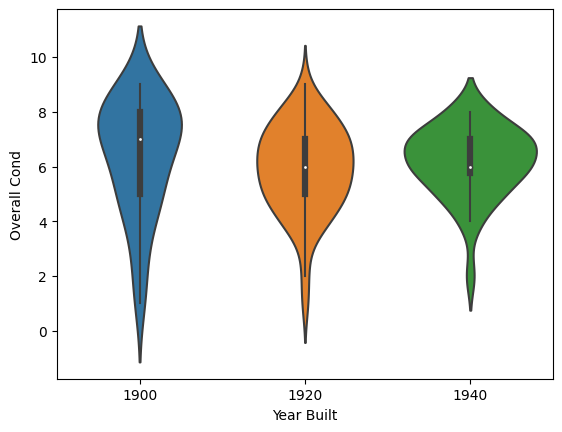

In [47]:
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

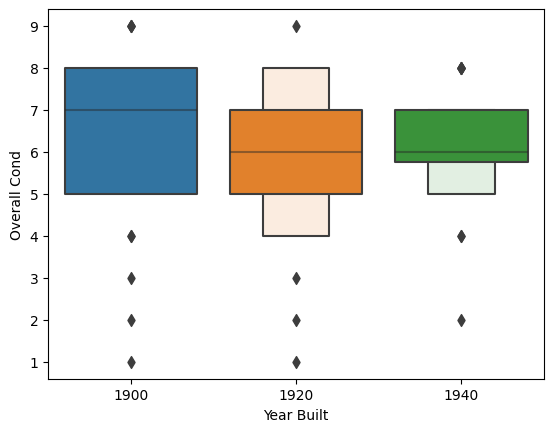

In [48]:
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

### 02_07 - Comparing Two Categoricals

Goals:


* Create a cross-tabulation 
* Style the cross-tabulation table 
* Explore the documentation of the `.background_gradient` method of pandas styling.
* Create a stacked bar plot of a cross-tabulation

In [49]:
# 2 Categoricals
housing.dtypes[:40]


Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
Lot Area          uint32[pyarrow]
Street                   category
Alley                    category
Lot Shape                category
Land Contour             category
Utilities                category
Lot Config               category
Land Slope               category
Neighborhood             category
Condition 1              category
Condition 2              category
Bldg Type                category
House Style              category
Overall Qual       uint8[pyarrow]
Overall Cond       uint8[pyarrow]
Year Built        uint16[pyarrow]
Year Remod/Add    uint16[pyarrow]
Roof Style               category
Roof Matl                category
Exterior 1st             category
Exterior 2nd             category
Mas Vnr Type             category
Mas Vnr Area      uint16[pyarrow]
Exter Qual               category
Exter Cond    

In [53]:
# 2 Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [54]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [55]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Fa,Gd,Missing,NA,Po,TA
Overall Qual,,,,,,,
1,0,0,0,0,3,1,0
2,0,4,0,0,4,0,5
3,0,9,0,0,10,0,21
4,0,16,2,1,24,1,182
5,1,39,24,0,32,2,727
6,1,28,28,0,3,0,672
7,0,5,33,0,3,0,561
8,1,3,25,0,0,1,320
9,0,0,9,0,0,0,98


In [58]:
raw.style.background_gradient?

Signature:
raw.style.background_gradient(
    cmap: 'str | Colormap' = 'PuBu',
    low: 'float' = 0,
    high: 'float' = 0,
    axis: 'Axis | None' = 0,
    subset: 'Subset | None' = None,
    text_color_threshold: 'float' = 0.408,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    gmap: 'Sequence | None' = None,
) -> 'Styler'
Docstring:
Color the background in a gradient style.

The background color is determined according
to the data in each column, row or frame, or by a given
gradient map. Requires matplotlib.

Parameters
----------
cmap : str or colormap
    Matplotlib colormap.
low : float
    Compress the color range at the low end. This is a multiple of the data
    range to extend below the minimum; good values usually in [0, 1],
    defaults to 0.
high : float
    Compress the color range at the high end. This is a multiple of the data
    range to extend above the maximum; good values usually in [0, 1],
    defaults to 0.
axis : {0, 1, "index", "columns", N

In [59]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

Bsmt Cond,Ex,Gd,TA,Fa,Po,Missing,NA
Overall Qual,,,,,,,
1,0,0,0,0,1,0,3
2,0,0,5,4,0,0,4
3,0,0,21,9,0,0,10
4,0,2,182,16,1,1,24
5,1,24,727,39,2,0,32
6,1,28,672,28,0,0,3
7,0,33,561,5,0,0,3
8,1,25,320,3,1,0,0
9,0,9,98,0,0,0,0


<Axes: xlabel='Overall Qual'>

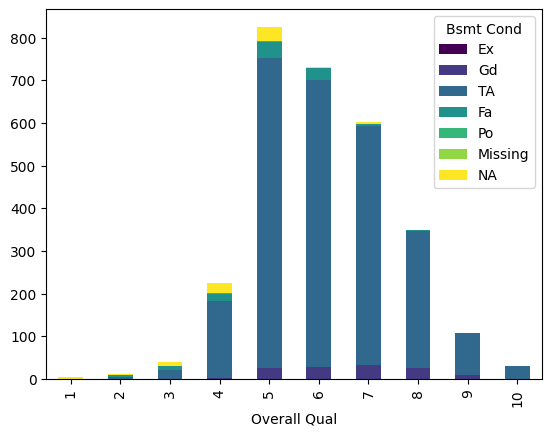

In [63]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .plot.bar(stacked=True, 
           cmap='viridis')
)

### 02_08 - Challenge: Explore Ames
* Create a scatter plot of *1st Flr SF* against *SalePrice*

<Axes: xlabel='SalePrice', ylabel='1st Flr SF'>

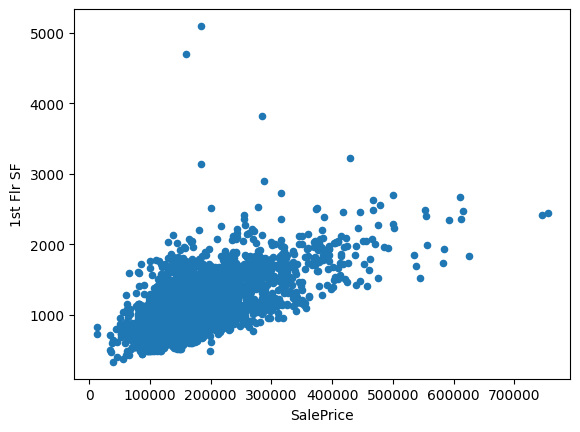

In [71]:
#02_09 - Solution
(housing
 #.sample(300)
 .plot.scatter(x='SalePrice', y='1st Flr SF',# alpha=.05
               ))

## Linear Regression


### 03_01 - Linear Regression

Goals:

* Understand how to prepare data for linear regression by selecting the relevant numerical features and the target variable.
* Learn to split the data into training and testing sets using `train_test_split` 
* Evaluate the performance of the linear regression model 

In [6]:
from sklearn import linear_model, model_selection, preprocessing

X = housing.select_dtypes('number').drop(columns='SalePrice')
y = housing.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [4]:
X_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,845,907181100,20,68,9017,7,5,1999,1999,0,...,666,0,35,0,0,0,0,0,9,2009
2730,2731,905351045,150,<NA>,1700,7,5,1980,1981,0,...,450,188,36,0,0,200,0,0,4,2006
2793,2794,907255050,20,<NA>,14781,8,5,2001,2002,178,...,748,198,150,0,0,0,0,0,8,2006
1187,1188,534127230,20,85,11050,6,5,1968,1968,0,...,512,25,0,0,0,192,0,0,10,2008
2770,2771,907130110,60,65,12438,6,5,1995,1995,68,...,473,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,527226040,190,195,41600,5,5,1969,1990,0,...,828,144,0,0,0,0,0,0,11,2007
1095,1096,528290090,60,<NA>,7750,7,5,2002,2002,<NA>,...,403,100,35,0,0,0,0,0,4,2008
1130,1131,528490080,60,64,8791,6,5,2003,2003,0,...,673,216,56,0,0,0,0,0,5,2008
1294,1295,902109160,50,81,7308,5,5,1920,1950,0,...,225,0,0,236,0,0,0,0,6,2008


In [5]:
y_train

844     192000
2730    148400
2793    275000
1187    150000
2770    187000
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2197, dtype: uint32[pyarrow]

In [6]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
X_train.isna().any()

Order              False
PID                False
MS SubClass        False
Lot Frontage        True
Lot Area           False
Overall Qual       False
Overall Cond       False
Year Built         False
Year Remod/Add     False
Mas Vnr Area        True
BsmtFin SF 1        True
BsmtFin SF 2        True
Bsmt Unf SF         True
Total Bsmt SF       True
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Bsmt Full Bath      True
Bsmt Half Bath      True
Full Bath          False
Half Bath          False
Bedroom AbvGr      False
Kitchen AbvGr      False
TotRms AbvGrd      False
Fireplaces         False
Garage Yr Blt       True
Garage Cars         True
Garage Area         True
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Pool Area          False
Misc Val           False
Mo Sold            False
Yr Sold            False
dtype: bool

In [3]:
import pandas as pd
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    
    

housing2 = clean_housing_no_na(raw)

In [7]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

In [8]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8434707037243702

### 03_02 - Interpreting Linear Regression Models

In [11]:
lr.coef_

array([-1.03814738e+01,  9.02411860e-07, -1.63050576e+02,  2.81284818e+01,
        4.92668567e-01,  1.73466716e+04,  4.84079679e+03,  3.91645014e+02,
        1.76965630e+02,  2.73066661e+01,  1.05967267e+01,  4.13482948e+00,
       -2.72938006e+00,  1.20021764e+01,  1.87157913e+01,  2.54896650e+01,
       -9.18032355e+00,  3.50251329e+01,  7.35666770e+03, -1.51315712e+03,
       -1.41742224e+02, -5.39960782e+03, -7.73039749e+03, -1.43271176e+04,
        1.36191997e+03,  3.51407523e+03, -1.31044446e+01,  1.03630326e+04,
        1.49225509e+01,  1.99789208e+01, -6.04065085e+00,  2.04208107e+01,
       -5.67776073e+00,  7.08392922e+01, -3.93865793e+01, -8.71867696e+00,
        2.35118730e+02, -8.15826993e+03])

In [12]:
lr.intercept_

15240773.74605515

In [13]:
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

In [14]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

Order             -1.038147e+01
PID                9.024119e-07
MS SubClass       -1.630506e+02
Lot Frontage       2.812848e+01
Lot Area           4.926686e-01
Overall Qual       1.734667e+04
Overall Cond       4.840797e+03
Year Built         3.916450e+02
Year Remod/Add     1.769656e+02
Mas Vnr Area       2.730667e+01
BsmtFin SF 1       1.059673e+01
BsmtFin SF 2       4.134829e+00
Bsmt Unf SF       -2.729380e+00
Total Bsmt SF      1.200218e+01
1st Flr SF         1.871579e+01
2nd Flr SF         2.548966e+01
Low Qual Fin SF   -9.180324e+00
Gr Liv Area        3.502513e+01
Bsmt Full Bath     7.356668e+03
Bsmt Half Bath    -1.513157e+03
Full Bath         -1.417422e+02
Half Bath         -5.399608e+03
Bedroom AbvGr     -7.730397e+03
Kitchen AbvGr     -1.432712e+04
TotRms AbvGrd      1.361920e+03
Fireplaces         3.514075e+03
Garage Yr Blt     -1.310444e+01
Garage Cars        1.036303e+04
Garage Area        1.492255e+01
Wood Deck SF       1.997892e+01
Open Porch SF     -6.040651e+00
Enclosed

<Axes: >

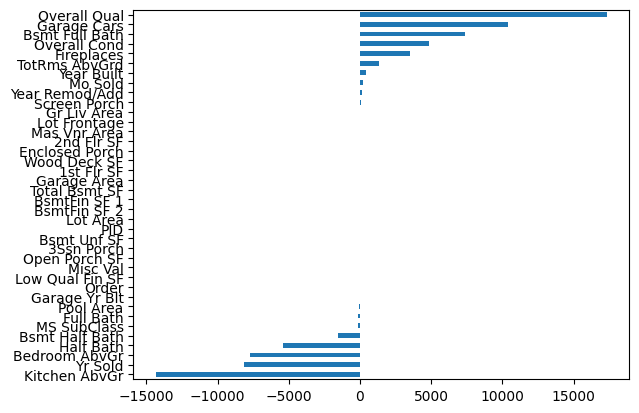

In [15]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .sort_values()
 .plot.barh())

<Axes: >

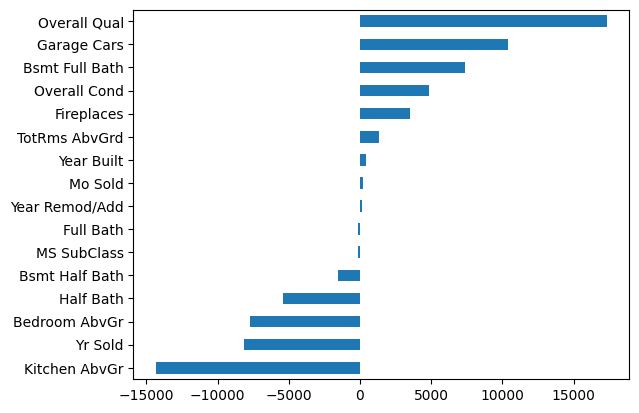

In [16]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .plot.barh())

In [17]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .index
)


Index(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'],
      dtype='object')

### 03_03 - Standardizing Values

Goals:

* Understand the concept of standardization 
* Learn to use the `StandardScaler` class 
* Evaluate the impact of standardization on the performance of the linear regression model using the coefficient of determination (R-squared) score.
* Visualize the coefficients of the linear regression model using a horizontal bar plot.

In [9]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [10]:
# was .84
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8434370794028713

<Axes: >

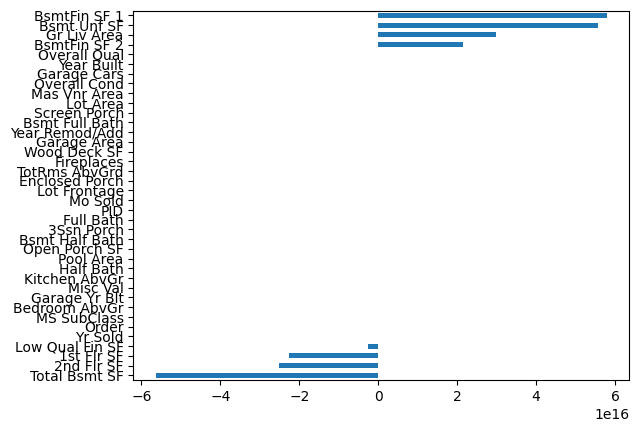

In [20]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .plot.barh())

In [21]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
# .plot.barh()
)

Total Bsmt SF     -5.629166e+16
2nd Flr SF        -2.510507e+16
1st Flr SF        -2.267957e+16
Low Qual Fin SF   -2.636470e+15
Yr Sold           -1.076103e+04
Order             -8.800166e+03
MS SubClass       -6.973844e+03
Bedroom AbvGr     -6.349259e+03
Garage Yr Blt     -5.755677e+03
Misc Val          -5.569632e+03
Kitchen AbvGr     -3.055499e+03
Half Bath         -2.699400e+03
Pool Area         -1.433878e+03
Open Porch SF     -4.284270e+02
Bsmt Half Bath    -3.588180e+02
3Ssn Porch        -1.431557e+02
Full Bath         -9.138520e+01
PID                1.954133e+02
Mo Sold            6.407905e+02
Lot Frontage       9.433781e+02
Enclosed Porch     1.343019e+03
TotRms AbvGrd      2.127978e+03
Fireplaces         2.306900e+03
Wood Deck SF       2.497563e+03
Garage Area        3.149410e+03
Year Remod/Add     3.648355e+03
Bsmt Full Bath     3.885482e+03
Screen Porch       4.015979e+03
Lot Area           4.066092e+03
Mas Vnr Area       4.772729e+03
Overall Cond       5.381661e+03
Garage C

<Axes: >

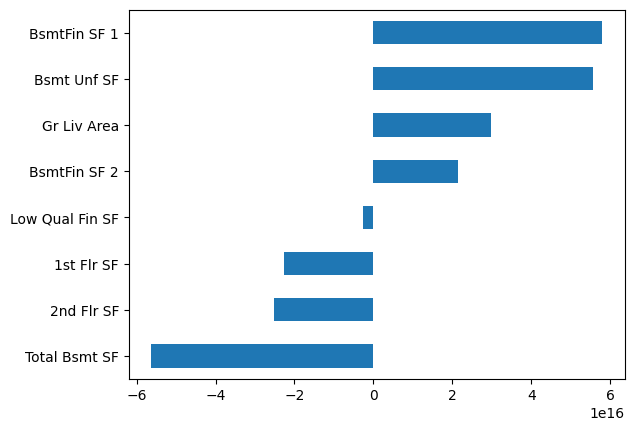

In [22]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .plot.barh()
)

In [23]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .index
)

Index(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'],
      dtype='object')

In [24]:
simple_feats = set(['Kitchen AbvGr', 'Yr Sold', 'Bedroom AbvGr', 'Half Bath',
       'Bsmt Half Bath', 'MS SubClass', 'Full Bath', 'Year Remod/Add',
       'Mo Sold', 'Year Built', 'TotRms AbvGrd', 'Fireplaces', 'Overall Cond',
       'Bsmt Full Bath', 'Garage Cars', 'Overall Qual'])
std_feats = set(['Total Bsmt SF', '2nd Flr SF', '1st Flr SF', 'Low Qual Fin SF',
       'BsmtFin SF 2', 'Gr Liv Area', 'Bsmt Unf SF', 'BsmtFin SF 1'])
print(sorted(simple_feats | std_feats))

['1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF', 'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']


In [25]:
# Look at correlations 
(X
 .assign(SalePrice=y)
 .corr()
 .loc[['SalePrice', '1st Flr SF', '2nd Flr SF', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 
       'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Fireplaces', 'Full Bath', 
       'Garage Cars', 'Gr Liv Area', 'Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF',
       'MS SubClass', 'Mo Sold', 'Overall Cond', 'Overall Qual', 'TotRms AbvGrd', 
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']]
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
 .set_sticky(axis='index') 
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
SalePrice,-0.031408,-0.246521,-0.085092,0.201875,0.266549,0.799262,-0.101697,0.558426,0.532974,0.502196,0.433147,0.006018,0.183308,0.632529,0.621676,0.269373,-0.037660,0.706780,0.275823,-0.035817,0.545604,0.285056,0.143913,-0.119814,0.495474,0.474558,0.253317,0.647562,0.640138,0.327143,0.312951,-0.128787,0.032225,0.112151,0.068403,-0.015691,0.035259,-0.030569,1.000000
1st Flr SF,-0.013201,-0.141902,-0.247828,0.241707,0.332235,0.477837,-0.157052,0.310463,0.242108,0.392280,0.457586,0.084710,0.296139,0.800429,1.000000,-0.250057,-0.012689,0.562166,0.257836,0.010469,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.147876,0.439471,0.491208,0.227131,0.238041,-0.065713,0.044061,0.098316,0.121821,0.093003,0.040496,-0.013667,0.621676
2nd Flr SF,-0.000417,-0.003289,0.304237,-0.002813,0.032996,0.241402,0.006218,0.016828,0.158939,0.120159,-0.163710,-0.098188,0.002320,-0.204487,-0.250057,1.000000,0.018024,0.655251,-0.163068,-0.059458,0.404143,0.611634,0.504651,0.069444,0.585214,0.165844,0.041983,0.180882,0.127508,0.089097,0.184538,0.055429,-0.032172,0.011741,0.044602,-0.005078,0.013247,-0.018530,0.269373
Bedroom AbvGr,0.015424,0.006345,-0.019208,0.112718,0.136569,0.063291,-0.006137,-0.055093,-0.021536,0.080590,-0.118575,-0.033033,0.188508,0.052721,0.106648,0.504651,0.070531,0.516808,-0.161084,0.020333,0.359489,0.247053,1.000000,0.240737,0.672647,0.076971,-0.038905,0.091135,0.073417,0.029711,0.083650,0.052115,-0.047151,0.009250,0.036707,0.000887,0.053677,-0.018008,0.143913
Bsmt Full Bath,-0.042499,-0.038306,0.014187,0.019554,0.124208,0.168373,-0.043458,0.212119,0.134590,0.139684,0.640212,0.163634,-0.398629,0.326861,0.257836,-0.163068,-0.047215,0.057367,1.000000,-0.149027,-0.023011,-0.035385,-0.161084,-0.018349,-0.043642,0.172775,0.064179,0.162644,0.184903,0.187283,0.080765,-0.069014,0.027086,0.052355,0.043730,-0.004817,-0.003322,0.044805,0.275823
Bsmt Half Bath,0.024987,0.004154,-0.003179,-0.031798,0.026448,-0.041433,0.084185,-0.030515,-0.046175,0.016609,0.077687,0.099147,-0.105784,0.012850,0.010469,-0.059458,-0.013385,-0.043498,-0.149027,1.000000,-0.046371,-0.057999,0.020333,-0.064671,-0.048069,0.038089,0.001307,-0.033210,-0.021147,0.051546,-0.035276,-0.009272,0.026971,0.042372,0.066911,0.036996,0.022741,-0.019556,-0.035817
Bsmt Unf SF,0.005842,-0.088102,-0.129987,0.139290,0.023883,0.270527,-0.137303,0.129311,0.165397,0.089662,-0.477244,-0.238420,1.000000,0.412248,0.296139,0.002320,0.047207,0.235870,-0.398629,-0.105784,0.274901,-0.033530,0.188508,0.065651,0.251633,0.001790,0.013214,0.180080,0.164837,-0.039285,0.119143,0.006383,-0.005399,-0.047945,-0.031963,-0.010125,0.021915,-0.036443,0.183308
BsmtFin SF 1,-0.032268,-0.098674,-0.059767,0.067034,0.191692,0.284458,-0.051341,0.280069,0.152240,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.640212,0.077687,0.078086,-0.008205,-0.118575,-0.086654,0.048118,0.296098,0.125795,0.255311,0.309649,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,-0.000884,0.022341,0.433147
BsmtFin SF 2,-0.002758,-0.001245,-0.070847,-0.005254,0.083198,-0.041122,0.040992,-0.027328,-0.061934,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,0.099147,-0.076262,-0.033004,-0.033033,-0.037864,-0.049288,0.067180,0.048897,-0.014118,0.003625,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.006018
Fireplaces,-0.019156,-0.108056,-0.049955,0.051240,0.256989,0.393007,-0.031702,0.170672,0.133322,0.270051,0.296098,0.067180,0.001790,0.333

### 03_04 - Regression with XGBoost

Goals:

* Learn to use the XGBoost library (`xgboost`) for regression tasks.
* Evaluate the performance of the XGBoost model.
* Explore the importance of features in the XGBoost model using the feature importances.

In [11]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [12]:
import xgboost as xgb
# was .84
xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.8990089684311526

<Axes: >

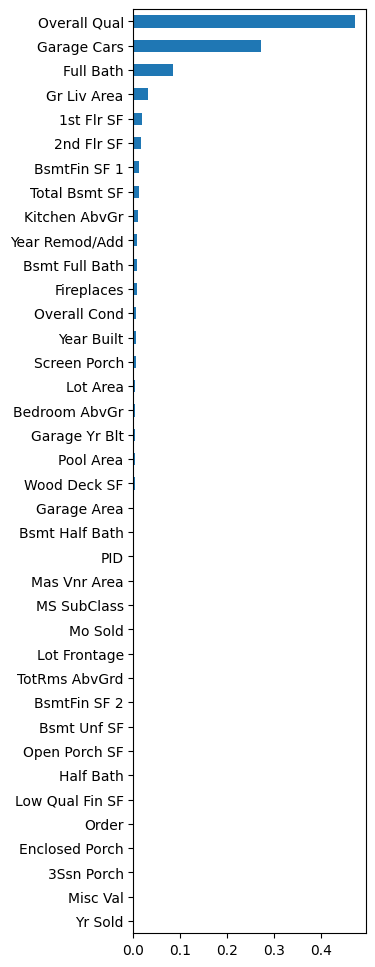

In [28]:
pd.Series(xg.feature_importances_, index=X_train.columns).sort_values().plot.barh(figsize=(3,12))

In [13]:
# Use categories
# (Need to convert pyarrow numbers to pandas 1.x numbers)
X_cat = (housing.assign(**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))

y_cat = housing.SalePrice
X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)
xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

0.9156284763324242

<Axes: >

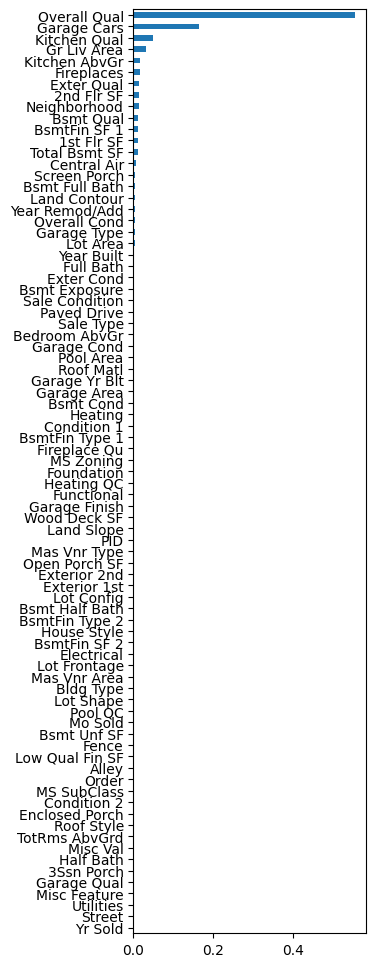

In [40]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))

### 03_05 - Challenge: Predict Ames
* Create a linear regression model using the top 5 features from the (non-categorical) XGBoost model
* What is the `.score` of the model?

In [23]:
# 03_06
top5 = list(pd.Series(xg.feature_importances_, index=X_train.columns)
  .sort_values()
  .index
  [-5:]
)

lr_top5 = linear_model.LinearRegression()
lr_top5.fit(X_train.loc[:, top5], y_train)
lr_top5.score(X_test.loc[:, top5], y_test)

0.792412229091269

## Hypothesis Test

### 04_01 - Exploring Data

Goals:

* Explore summary statistics by group


In [24]:
from scipy import stats
housing.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [25]:
(housing
 .groupby('Neighborhood')
 .describe())

Order                                                    \
              count         mean         std     min      25%     50%   
Neighborhood                                                            
Blmngtn        28.0  1500.000000  882.971205    53.0   473.75  1742.5   
Blueste        10.0  1187.800000   687.00021   299.0   933.25   935.5   
BrDale         30.0  1317.933333  852.662076    30.0   407.25  1045.5   
BrkSide       108.0  1465.037037  778.979802   130.0   742.75  1343.5   
ClearCr        44.0  1551.681818   895.21461   209.0   785.25  1405.0   
CollgCr       267.0  1683.273408  811.009037   250.0   867.50  1477.0   
Crawfor       103.0  1810.679612  778.304759   294.0   938.50  2199.0   
Edwards       194.0  1627.675258  852.935427   235.0   889.25  1502.5   
Gilbert       165.0  1285.254545  815.923617     5.0   479.00  1616.0   
Greens          8.0  1591.375000  1131.30417   107.0   459.00  2188.5   
GrnHill         2.0  2575.000000  449.719913  2257.0  2416.00  2575.0   
IDOTRR         93.0  1737.784946  798.086201   206.0  1361.00  1559.0   
Landmrk         1.0  2789.000000        <NA>  2789.0  2789.00  2789.0   
MeadowV        37.0  1779.243243  959.225452   327.0   978.00  1601.0   
Mitchel       114.0  1707.078947  884.002664   310.0   972.25  1604.5   
NAmes         443.0  1396.733634  847.035881     1.0   636.50  1266.0   
NPkVill        23.0   851.826087  790.536967    33.0   410.50   416.0   
NWAmes        131.0  1245.251908  775.591252    20.0   583.50  1188.0   
NoRidge        71.0  1337.154930  850.279595    60.0   502.50  1158.0   
NridgHt       166.0  1226.819277   789.81649    37.0   447.25  1073.5   
OldTown       239.0  1454.271967  832.683117   159.0   709.50  1314.0   
SWISU          48.0  1496.583333  962.873046   212.0   906.75  1518.5   
Sawyer        151.0  1543.794702  877.468262    84.0   772.50  1398.0   
SawyerW       125.0  1218.232000  807.823701    73.0   547.00  1135.0   
Somerst       182.0  1284.609890  780.019717    23.0   527.25  1168.5   
StoneBr        51.0  1326.568627  839.230392     7.0   368.50  1632.0   
Timber         72.0  1721.347222  801.830901   315.0   965.75  1584.5   
Veenker        24.0  1552.291667  636.580913   564.0  1179.75  1828.5   

                                 PID                ...  Yr Sold          \
                  75%     max  count          mean  ...      75%     max   
Neighborhood                                        ...                    
Blmngtn       2423.25  2430.0   28.0  5.282284e+08  ...  2009.00  2010.0   
Blueste       1543.75  2228.0   10.0  9.094523e+08  ...  2009.00  2010.0   
BrDale        2365.75  2373.0   30.0  5.274509e+08  ...  2009.00  2010.0   
BrkSide       2017.25  2688.0  108.0  8.486135e+08  ...  2009.00  2010.0   
ClearCr       2118.25  2768.0   44.0  9.054844e+08  ...  2009.00  2010.0   
CollgCr       2160.50  2816.0  267.0  9.070853e+08  ...  2009.00  2010.0   
Crawfor       2226.00  2885.0  103.0  9.095240e+08  ...  2009.00  2010.0   
Edwards       2188.75  2845.0  194.0  9.071216e+08  ...  2009.00  2010.0   
Gilbert       1757.00  2442.0  165.0  5.277561e+08  ...  2009.00  2010.0   
Greens        2520.25  2522.0    8.0  5.332531e+08  ...  2009.25  2010.0   
GrnHill       2734.00  2893.0    2.0  9.162527e+08  ...  2006.75  2007.0   
IDOTRR        2242.00  2883.0   93.0  9.086032e+08  ...  2008.00  2010.0   
Landmrk       2789.00  2789.0    1.0  9.072302e+08  ...  2006.00  2006.0   
MeadowV       2909.00  2921.0   37.0  9.232268e+08  ...  2009.00  2010.0   
Mitchel       2299.75  2930.0  114.0  9.206062e+08  ...  2009.00  2010.0   
NAmes         1961.50  2635.0  443.0  5.338416e+08  ...  2009.00  2010.0   
NPkVill       1365.00  2378.0   23.0  5.274536e+08  ...  2009.00  2010.0   
NWAmes        1866.50  2541.0  131.0  5.303630e+08  ...  2009.00  2010.0   
NoRidge       1833.50  2504.0   71.0  5.292254e+08  ...  2009.00  2010.0   
NridgHt       1717.75  2410.0  166.0  5.281454e+08  ...  2009.00  2010.0   
Ol

In [26]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
)

SalePrice                                                   \
                 count           mean           std       min       25%   
Neighborhood                                                              
CollgCr          267.0  201803.434457  54187.843749  110000.0  160875.0   
NAmes            443.0  145097.349887  31882.707229   68000.0  127000.0   

                                            
                   50%       75%       max  
Neighborhood                                
CollgCr       200000.0  228250.0  475000.0  
NAmes         140000.0  157500.0  345000.0

In [27]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
 .T
)

Neighborhood           CollgCr          NAmes
SalePrice count     267.000000     443.000000
          mean   201803.434457  145097.349887
          std     54187.843749   31882.707229
          min    110000.000000   68000.000000
          25%    160875.000000  127000.000000
          50%    200000.000000  140000.000000
          75%    228250.000000  157500.000000
          max    475000.000000  345000.000000

### 04_02 - Visualizing Distributions

Goals

* Make histograms of both distributions
* Make a cumulative distribution plot

In [28]:
n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

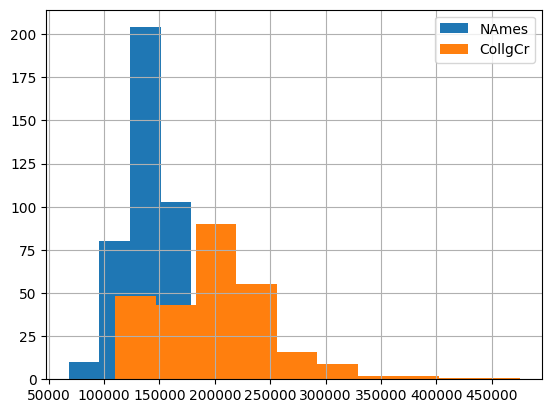

In [29]:
ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr')
ax.legend()

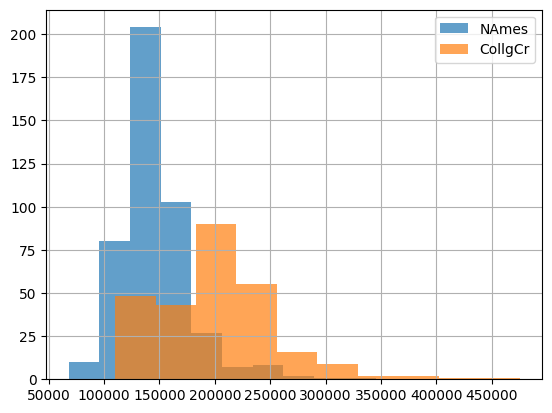

In [30]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

<Axes: xlabel='SalePrice'>

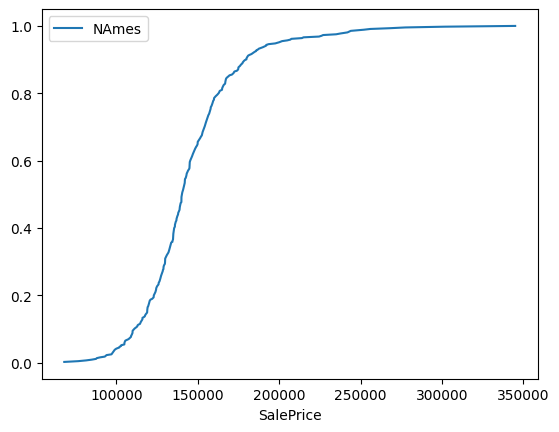

In [35]:
(n_ames
 .to_frame()
 .assign(cdf=n_ames.rank(method='average', pct=True))
 .sort_values(by='SalePrice')
 .plot(x='SalePrice', y='cdf', label='NAmes')
)

0       215000
1       105000
2       172000
3       244000
23      149000
         ...  
2630    155000
2631    134500
2632    120000
2633    105000
2634    124000
Name: SalePrice, Length: 443, dtype: uint32[pyarrow]

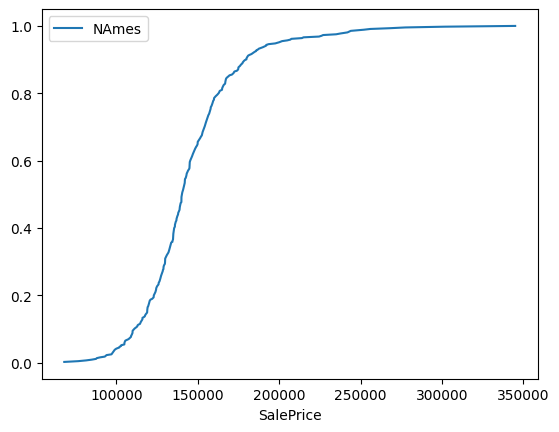

In [36]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
plot_cdf(n_ames, label='NAmes')

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: uint32[pyarrow]

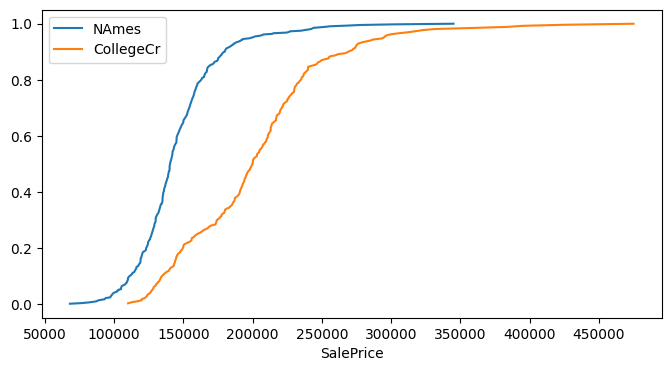

In [39]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
plot_cdf(college_cr, label='CollegeCr', ax=ax)

### 04_03 - Running Statistical Tests

Goals:

* Use the `scipy.stats` module to run a statistical test

In [40]:
print(dir(stats))

['ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'NearConstantInputWarning', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sobol', '_statlib', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_tukeylambda_stats', '_variation', '_warnings_errors', 'alexandergovern', 'alpha', 'anderson', 'anderson_ksamp', 'anglit', 'ansari', 'arcsine', 'argus', 'barnard_exact', 'bartlett', 'bayes

In [41]:
stats.ks_2samp?

Signature: stats.ks_2samp(data1, data2, alternative='two-sided', method='auto')
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):

      * 'auto' : use 'exact' for small size arrays, 'asymp' for large
      * 'exact' : use exact distribution of test statisti

In [42]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)

0.5836609430085982 3.2892428354379855e-53


In [44]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')


Reject null hypothesis: Not from the same distribution


### 04_04 - Testing for Normality

Goals:

* Use the `scipy.stats` module to test for normality
* Use the `scipy.stats` module to create a probability plot

In [45]:
# Use the Shapiro-Wilks test
shapiro_stat, p_value = stats.shapiro(n_ames)

In [46]:
if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")


The distribution of the series is likely not normal (reject H0)


In [47]:
p_value

5.124374299470901e-17

In [48]:
stats.probplot?

Signature:
stats.probplot(
    x,
    sparams=(),
    dist='norm',
    fit=True,
    plot=None,
    rvalue=False,
)
Docstring:
Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data and plots the
results using Matplotlib or a given plot function.

Parameters
----------
x : array_like
    Sample/response data from which `probplot` creates the plot.
sparams : tuple, optional
    Distribution-specific shape parameters (shape parameters plus location
    and scale).
dist : str or stats.distributions instance, optional
    Distribution or distribution function name. The default is 'norm' for a
    normal probability plot.  Objects that look enough like a
    stats.distributions instance (i.e. they have a ``ppf`` method) are also
    accepted.
fit : bool, optional
    F

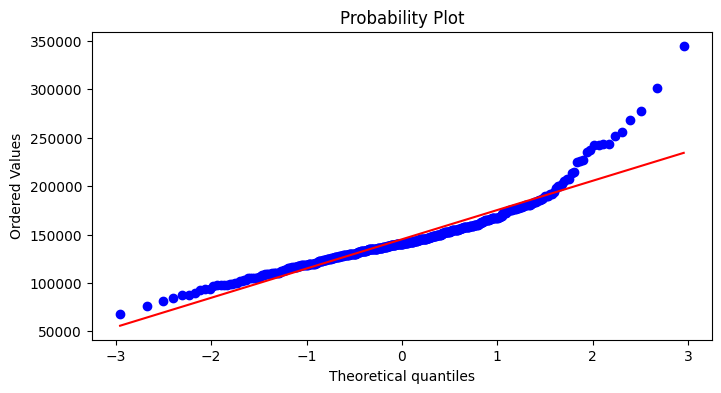

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(n_ames, plot=ax)

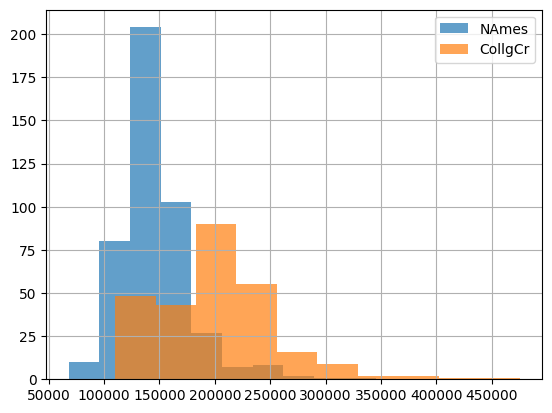

In [50]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

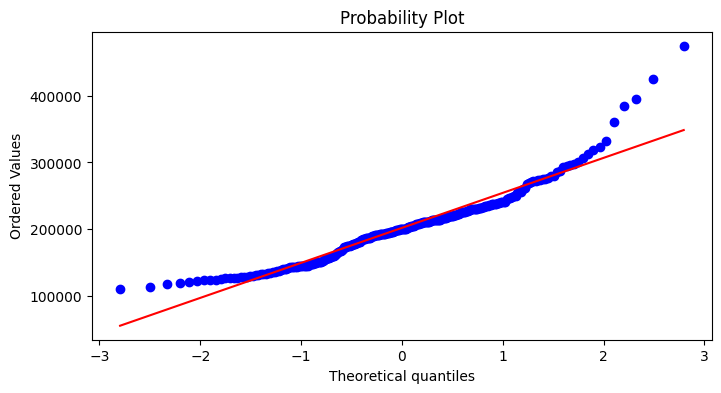

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(college_cr, plot=ax)

### 04_05 - Challenge: Checking Square Footage Distributions
* Is the distribution of *1st Flr SF* from *NAmes* and *CollgCr* the same?

In [59]:
# 04_06
n_ames_sf = (housing
  .query('Neighborhood == "NAmes"')
  .loc[:, '1st Flr SF']
)
college_cr_sf = (housing
             .query('Neighborhood == "CollgCr"')
             .loc[:, '1st Flr SF']
             )

249     1694
250     1208
251     1226
252     1222
256      965
        ... 
2811     860
2812    1336
2813     750
2814     728
2815    1310
Name: 1st Flr SF, Length: 267, dtype: uint16[pyarrow]

<Axes: >

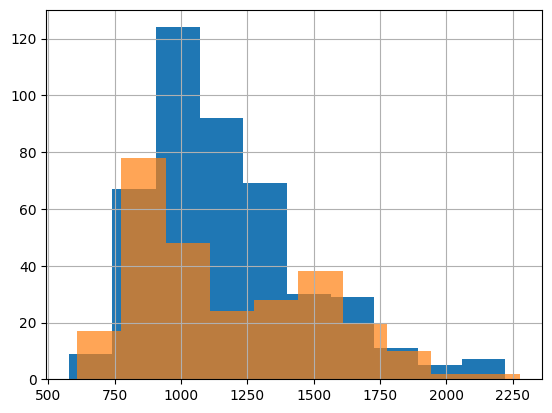

In [62]:
ax = n_ames_sf.hist()
college_cr_sf.hist(ax=ax, alpha=.7)

In [63]:
ks, p_value = stats.ks_2samp(n_ames_sf, college_cr_sf)
p_value

0.0007057410997705426